In [1]:
import tensorflow as tf
from KyleNet import KyleNet
from pathlib import Path

# Get the metadata
META = Path(".").resolve().parent.joinpath("metadata.csv")

c:\users\kyle\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\kyle\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\users\kyle\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [6]:
if tf.test.gpu_device_name():
    print(f"GPU Device: {tf.test.gpu_device_name()}\n")
else:
    print("Running off of CPU\n")

GPU Device: /device:GPU:0



## Experiment 2.
##### This experiment is ran with a balanced dataset so that there's an equal number of COVID-19 and NON-COVID classes

In [7]:
exp2 = KyleNet(META, "Experiment 2", balance_dataset=True)

Found 57830 validated image filenames belonging to 2 classes.
Found 19276 validated image filenames belonging to 2 classes.


In [10]:
# Check the datasets been balanced and it's correct
print(f"Overall Balance:\n{exp2.df['finding'].value_counts()}\n")
print(f"Balance for CXR:\n{exp2.df.loc[exp2.df['modality'] == 'X-ray', 'finding'].value_counts()}\n")
print(f"Balance for CT:\n{exp2.df.loc[exp2.df['modality'] == 'CT', 'finding'].value_counts()}")

Overall Balance:
NON-COVID    38553
COVID-19     38553
Name: finding, dtype: int64

Balance for CXR:
NON-COVID    359
COVID-19     287
Name: finding, dtype: int64

Balance for CT:
COVID-19     38266
NON-COVID    38194
Name: finding, dtype: int64


Epoch 1/20
451/451 [==============================] - 279s 618ms/step - loss: 0.0690 - accuracy: 0.9777 - val_loss: 1.0433 - val_accuracy: 0.5394

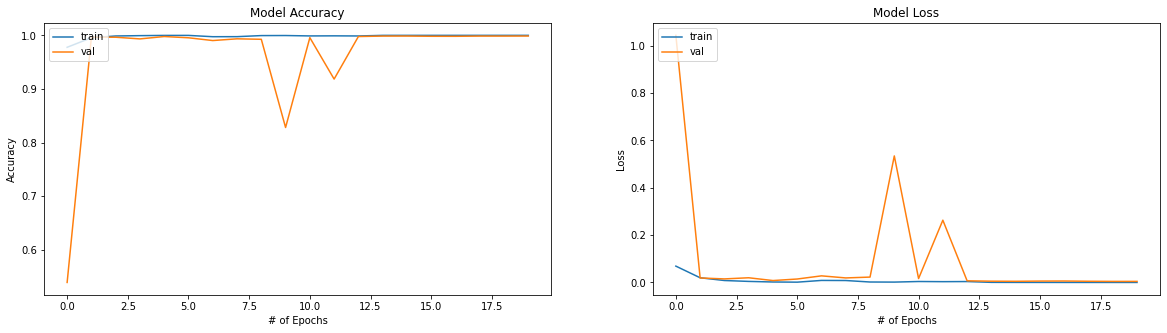

In [11]:
exp2.Train()
exp2.PlotHistory()

In [12]:
exp2.Evaluate()

151/151 [==============================] - 66s 437ms/step - loss: 0.0045 - accuracy: 0.9988

In [13]:
exp2.Predict()

151/151 [==============================] - 64s 424ms/step

In [14]:
exp2.MetricReport()

              precision    recall  f1-score   support

    COVID-19       1.00      1.00      1.00      9571
   NON-COVID       1.00      1.00      1.00      9705

    accuracy                           1.00     19276
   macro avg       1.00      1.00      1.00     19276
weighted avg       1.00      1.00      1.00     19276



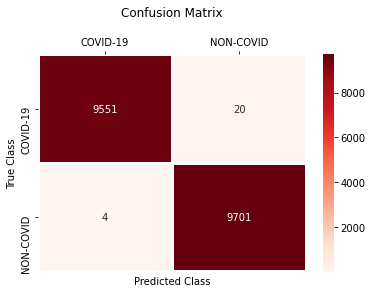

In [15]:
exp2.ConfusionMatrix()

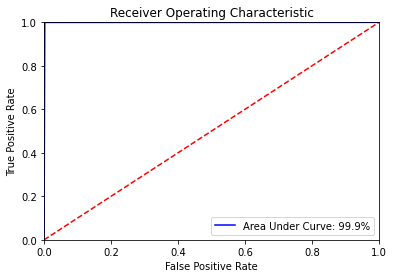

In [16]:
exp2.ROC()

In [17]:
exp2.Save()